<a href="https://colab.research.google.com/github/samartha007/Psoriasis-detection-using-transfer-learning/blob/New-random-sampling-method/Mobile_net_parameter_tuweking_with_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve,auc


from keras.applications.mobilenet import MobileNet
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
#### Modeling
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import EfficientNetB0
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import cross_val_score,cross_val_predict, StratifiedKFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc



In [2]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import preprocess_input

# Path to the directories containing the class data
class_1_directory = '/content/gdrive/MyDrive/all patch data/disease_with_online_data'
class_2_directory = '/content/gdrive/MyDrive/all patch data/normal'

# Get a list of image filenames for each class
class_1_filenames = os.listdir(class_1_directory)
class_2_filenames = os.listdir(class_2_directory)

# Create empty lists to store the data and labels
data = []
labels = []

# Loop over each image in class 1
for image_filename in class_1_filenames:
    # Read the image
    image_path = os.path.join(class_1_directory, image_filename)
    image = Image.open(image_path)

    # Preprocess the image for VGG16
    image = image.resize((224, 224))
    # image = image.convert('RGB')
    image = np.array(image)
    # image = preprocess_input(image)

    # Add the preprocessed image and corresponding label to the lists
    data.append(image)
    labels.append(0)  # Class 1 is labeled as 0

# Loop over each image in class 2
for image_filename in class_2_filenames:
    # Read the image
    image_path = os.path.join(class_2_directory, image_filename)
    image = Image.open(image_path)

    # Preprocess the image for VGG16
    image = image.resize((224, 224))
    # image = image.convert('RGB')
    image = np.array(image)
    # image = preprocess_input(image)

    # Add the preprocessed image and corresponding label to the lists
    data.append(image)
    labels.append(1)  # Class 2 is labeled as 1

# Convert the lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)
# # Normalize the image data
data = data / 255.0
# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Mobilenet
# Set the random seed
random_seed = 42
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

from keras.applications.mobilenet import MobileNet

# Step 2: Load a pre-trained model (VGG16 in this example)
base_model =MobileNet(
    input_shape=(256,256,3),
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=False
)

# Step 3: Build your model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
base_model.trainable=False
# Step 4: Compile your model
model.compile(optimizer=SGD(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train your model
model.fit(X_train1, y_train1, batch_size=50, epochs=10, validation_data=(X_test1, y_test1))

# Step 6: Evaluate your model
y_pred = model.predict(X_test1)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test1, y_pred_binary)
precision = precision_score(y_test1, y_pred_binary)
recall = recall_score(y_test1, y_pred_binary)
f1 = f1_score(y_test1, y_pred_binary)
confusion_mat = confusion_matrix(y_test1, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_mat)


Epoch 1/10
6/6 [==============================] - 29s 5s/step - loss: 2.1049 - accuracy: 0.6293 - val_loss: 0.1531 - val_accuracy: 0.9189
Epoch 2/10
6/6 [==============================] - 32s 6s/step - loss: 0.1443 - accuracy: 0.9388 - val_loss: 0.1278 - val_accuracy: 0.9595
Epoch 3/10
6/6 [==============================] - 26s 5s/step - loss: 0.0902 - accuracy: 0.9796 - val_loss: 0.0854 - val_accuracy: 0.9730
Epoch 4/10
6/6 [==============================] - 24s 4s/step - loss: 0.0495 - accuracy: 0.9864 - val_loss: 0.0832 - val_accuracy: 0.9595
Epoch 5/10
6/6 [==============================] - 27s 4s/step - loss: 0.0351 - accuracy: 0.9966 - val_loss: 0.0692 - val_accuracy: 0.9730
Epoch 6/10
6/6 [==============================] - 27s 5s/step - loss: 0.0193 - accuracy: 0.9966 - val_loss: 0.0636 - val_accuracy: 0.9730
Epoch 7/10
6/6 [==============================] - 26s 5s/step - loss: 0.0225 - accuracy: 0.9966 - val_loss: 0.0648 - val_accuracy: 0.9730
Epoch 8/10
6/6 [==================

In [ ]:
## calculating Specificity and Sensitivity
# Creating a function to report confusion metrics
def f1_scores (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    return conf_f1,conf_sensitivity,conf_specificity


In [ ]:

#### Model Performance
from sklearn import metrics
def performance(y_true,y_pred_probs):
    cm = metrics.confusion_matrix(y_true, y_pred_probs)
    print('     sensitivity :',(f1_scores(cm)[1]))
    print('     specificity :',(f1_scores(cm)[2]))
# y_true, y_pred_probs
print('Mobilenet ')
performance(y_test1,y_pred_binary)

Mobilenet 
     sensitivity : 1.0
     specificity : 0.9555555555555556


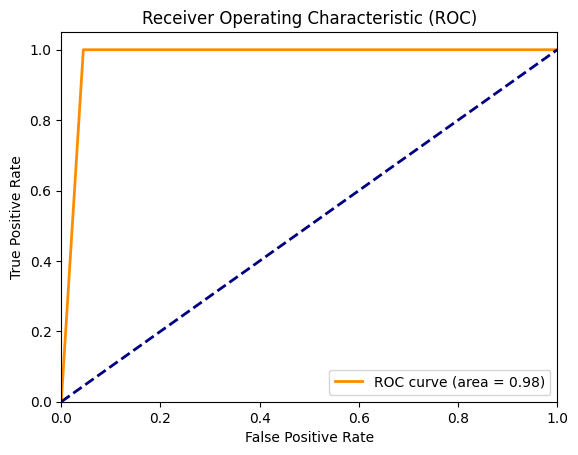

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score,cross_val_predict, StratifiedKFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


# Define a function to create the Keras model
def create_model():
    # Load the pre-trained VGG16 model
    base_model = MobileNet(
    input_shape=(224,224,3),
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=False
)

    # Set up the model architecture
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(224, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    base_model.tranable=False
    # Compile the model
    model.compile(optimizer=SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create a scikit-learn compatible KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=50, verbose=0, random_state=42)

# Define the number of folds for cross-validation
num_folds = 5

# Define the cross-validation strategy (e.g., StratifiedKFold)
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
results = cross_val_score(model, data, labels, cv=cv, scoring='accuracy')
results1 = cross_val_score(model, data, labels, cv=cv, scoring='recall')
# Print the cross-validation results
print("Cross-validation Results: ", results)
print("Mean Accuracy: ", np.mean(results))
print("Standard Deviation: ", np.std(results))

# Print the cross-validation results
print("Cross-validation Results: ", results1)
print("Mean ROC: ", np.mean(results1))
print("Standard Deviation: ", np.std(results1))
# Perform cross-validation
y_pred = cross_val_predict(model, data, labels, cv=cv)
binary_predictions = np.where(y_pred > 0.5, 1, 0)
# Compute the confusion matrix
cm = confusion_matrix(labels, binary_predictions)
print(cm)
# Extract true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = cm.ravel()
# Calculate specificity and sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# Print the specificity and sensitivity
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)
# Perform cross-validation
y_pred_proba = cross_val_predict(model, data, labels, cv=cv, method='predict_proba')[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(labels, y_pred_proba)
print(fpr, tpr)
# Compute the AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print the AUC
print("AUC: ", roc_auc)

<ipython-input-15-34dabde65068>:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=50, verbose=0)


3/3 [==============================] - 1s 30ms/step
Cross-validation Results:  [0.85135135 0.90540541 0.86486486 0.80821918 0.87671233]
Mean Accuracy:  0.8613106256941873
Standard Deviation:  0.031975251762521736
Cross-validation Results:  [0.96774194 1.         1.         1.         0.93333333]
Mean ROC:  0.9802150537634409
Standard Deviation:  0.026562404570571196
3/3 [==============================] - 2s 32ms/step
[[172  43]
 [ 11 142]]
Specificity:  0.8
Sensitivity:  0.9281045751633987
3/3 [==============================] - 1s 43ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
def crossvalidation_models(base,height,width):
  # Define the number of folds for cross-validation
  num_folds = 5

  # Define the cross-validation strategy (e.g., StratifiedKFold)
  cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

  # Initialize lists to store evaluation metrics
  specificities = []
  sensitivities = []

  # Iterate over each fold
  fold_no = 1
  for train, test in cv.split(data, labels):
      print(f'Training for fold {fold_no}')

      # Preprocess the data
      train_x = preprocess_input(data[train])
      test_x = preprocess_input(data[test])

      # Load the pre-trained VGG19 model
      base_model = base(weights='imagenet', include_top=False, input_shape=(height, width, 3))

      # Set up the model architecture
      model = Sequential()
      model.add(base_model)
      model.add(Flatten())
      model.add(Dense(256, activation='relu'))
      model.add(Dropout(0.5))
      model.add(Dense(1, activation='sigmoid'))
      base_model.trainable = False

      # Compile the model
      model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

      # Fit the model
      model.fit(train_x, labels[train], batch_size=30, epochs=10, verbose=1)

      # Make predictions on the test set
      y_pred = model.predict(test_x, verbose=0)

      # Compute the confusion matrix
      cm = confusion_matrix(labels[test], y_pred.round())

      # Calculate specificity and sensitivity
      specificity = calculate_specificity(cm)
      sensitivity = calculate_sensitivity(cm)

      # Append specificity and sensitivity to the lists
      specificities.append(specificity)
      sensitivities.append(sensitivity)

      fold_no += 1

  # Print the specificity and sensitivity for each fold
  for fold in range(num_folds):
      print(f'Fold {fold+1}: Specificity={specificities[fold]}, Sensitivity={sensitivities[fold]}')



## For Mobile Net application using the Newly mentioned method

In [4]:
#### SIR Newly Mentioned Logic of sampling
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
sns=[]
spc=[]
AUC=[]
validation_loss=[]
validation_accuracy=[]
# fpr=[]
# tpr=[]

# Assuming you have your feature data in 'X' and labels in 'y'
# Define your model as 'model'
# Define the number of epochs as 'num_epochs'
def sir_method(base,height,width):
# Get the total number of samples
  num_samples = len(labels)
  num_epochs=10
  for epoch in range(num_epochs):
      # Shuffle the data and labels
      shuffled_indices = np.random.permutation(num_samples)
      X_shuffled = data[shuffled_indices]
      y_shuffled =labels[shuffled_indices]

      # Split the data into training and validation sets
      train_size = int(0.8 * num_samples)
      X_train, X_val = X_shuffled[:train_size], X_shuffled[train_size:]
      y_train, y_val = y_shuffled[:train_size], y_shuffled[train_size:]
      base_model = base(weights='imagenet', include_top=False, input_shape=(height, width, 3))

        # Set up the model architecture
      model = Sequential()
      model.add(base_model)
      model.add(Flatten())
      model.add(Dense(height, activation='relu'))
      model.add(Dropout(0.5))
      model.add(Dense(1, activation='sigmoid'))
      base_model.trainable = False

      # Compile the model
      model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
      # Train the model on the training set
      model.fit(X_train, y_train, epochs=1, batch_size=50, verbose=0)
      # Evaluate the model on the validation set
      val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
      validation_loss.append(val_loss)
      validation_accuracy.append(val_acc)
      # Make predictions on the validation set
      y_pred = model.predict(X_val)
      # y_pred_prob = model.predict_proba(X_val)[:, 1]

      # Calculate sensitivity, specificity, and AUC
      cm = confusion_matrix(y_val, np.round(y_pred))
      tn, fp, fn, tp = cm.ravel()
      sensitivity = tp / (tp + fn)
      specificity = tn / (tn + fp)
      auc1 = roc_auc_score(y_val, y_pred)
      # roc_auc = roc_auc_score(y_val, y_pred_prob)
      sns.append(sensitivity)
      spc.append(specificity)
      AUC.append(auc1)
      y_pred_binary = (y_pred >= 0.5).astype(int)
      # Calculate the ROC curve
      fpr1, tpr1, thresholds = roc_curve(y_val, y_pred_binary)
      # roc_auc = auc(fpr, tpr)
      # fpr.append(fpr1)
      # tpr.append(tpr)
      # Plot the ROC curve
      print(epoch)
      print(auc1)
      # print(roc_auc)
      plt.plot(fpr1, tpr1, color='darkorange', lw=2, )
      plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver Operating Characteristic (ROC)')
      plt.legend(loc="lower right")
      plt.show()
            # ROC_AUC.append(roc_auc)
      # Print the evaluation metrics
      # print(f"Epoch {epoch+1} - Sensitivity: {sensitivity:.4f} - Specificity: {specificity:.4f} - AUC: {auc:.4f}")
  return sns,spc,AUC,validation_loss,validation_accuracy


3/3 [==============================] - 1s 29ms/step


0
0.9821428571428571


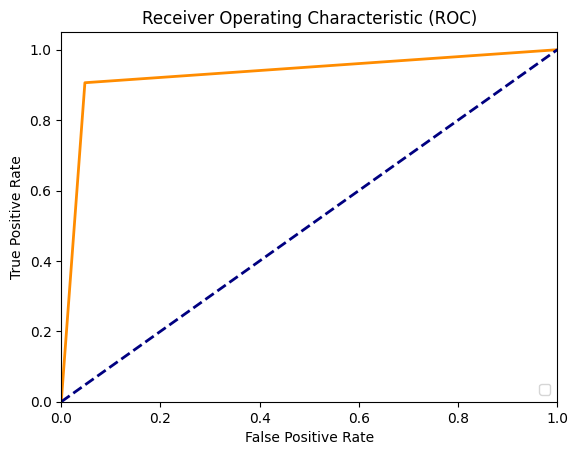

3/3 [==============================] - 1s 38ms/step


1
0.9882352941176471


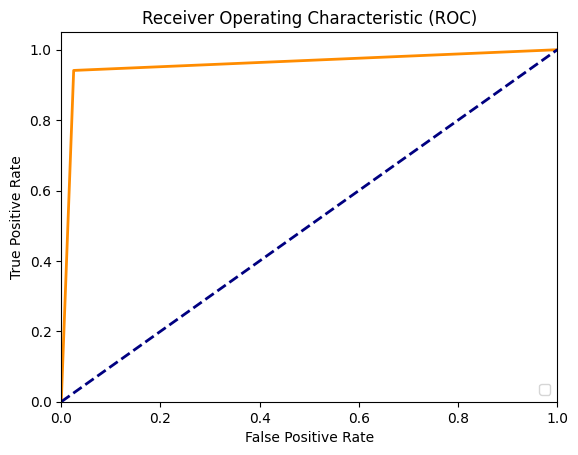

3/3 [==============================] - 1s 31ms/step


2
0.9246119733924613


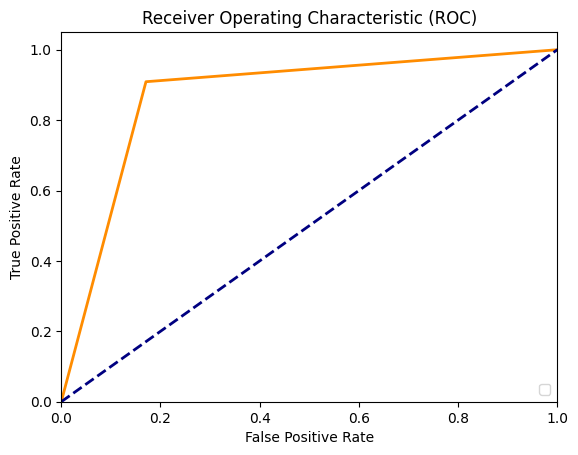

3/3 [==============================] - 1s 39ms/step


3
0.985248447204969


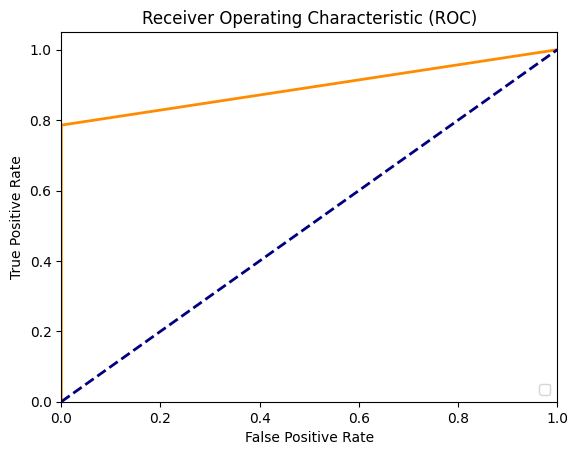

3/3 [==============================] - 1s 29ms/step


4
0.9860248447204969


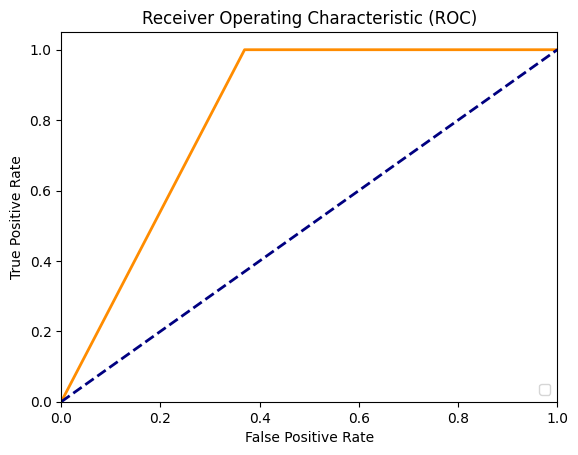

3/3 [==============================] - 0s 30ms/step


5
0.9968944099378882


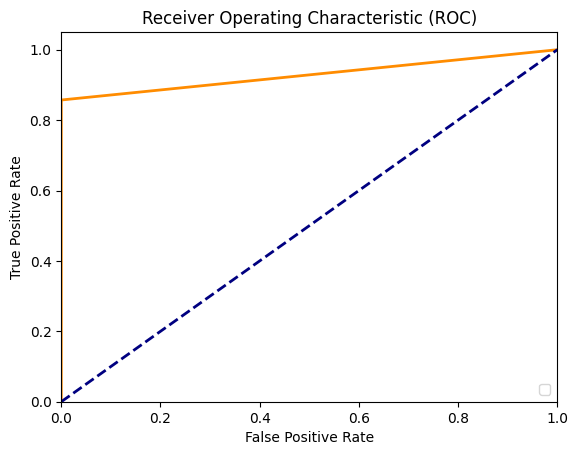

3/3 [==============================] - 0s 32ms/step


6
1.0


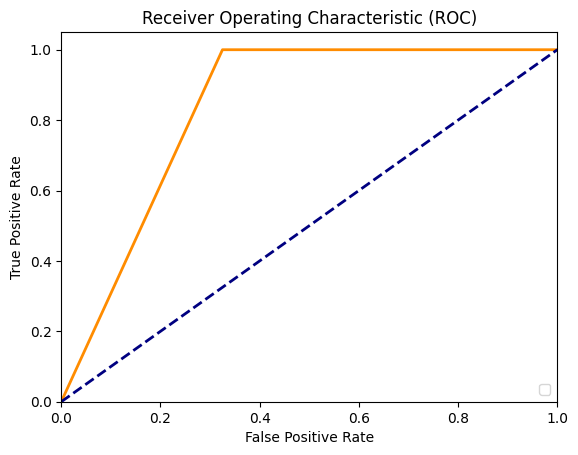

3/3 [==============================] - 0s 31ms/step


7
0.9947916666666667


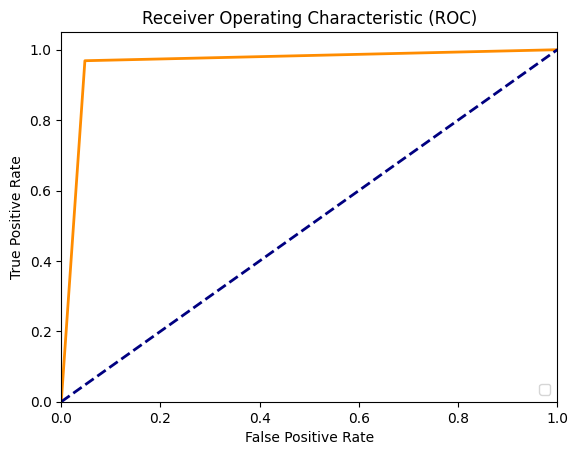

3/3 [==============================] - 0s 30ms/step


8
0.928937728937729


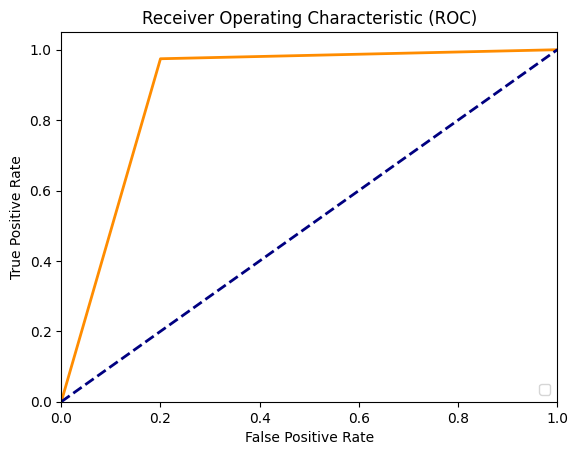

3/3 [==============================] - 0s 31ms/step


9
0.9858630952380952


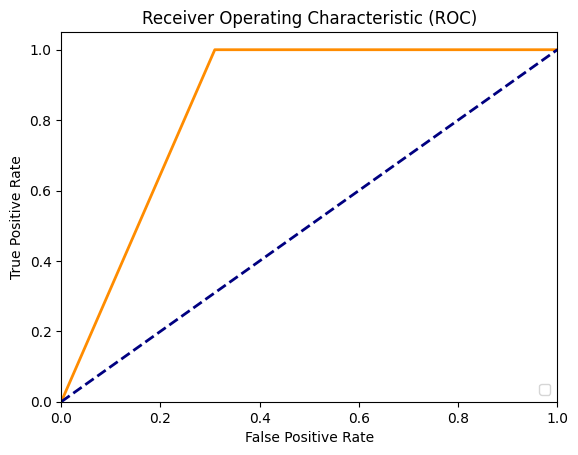

In [5]:
mobile_net_sns,mobile_net_spc,mobile_net_auc,mobile_net_val_loss,mobile_net_val_acc=sir_method(MobileNet,224,224)

In [6]:
print(f'Mean sensitivity of MobileNet after 10 epochs {np.mean(mobile_net_sns)}')
print(f'Mean specificity after 10 epochs {np.mean(mobile_net_spc)}')
print(f'Mean AUC after 10 epochs {np.mean(mobile_net_auc)}')

Mean sensitivity of MobileNet after 10 epochs 0.9342483496895262
Mean specificity after 10 epochs 0.8504941170529717
Mean AUC after 10 epochs 0.9772750317358809


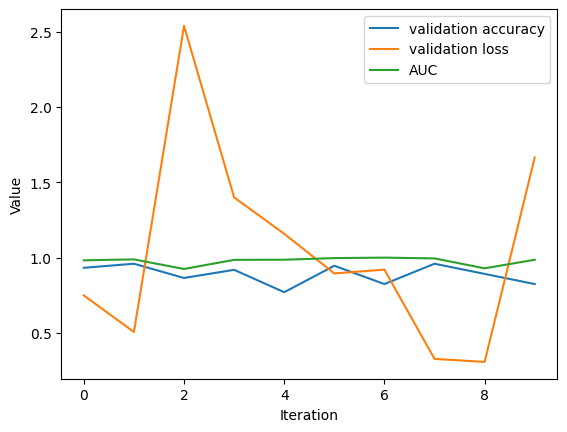

In [7]:

# Generate x-axis values (indices of the data list)
x = range(len(mobile_net_val_acc))

# Plot the data
plt.plot(x, mobile_net_val_acc,label='validation accuracy')
plt.plot(x, mobile_net_val_loss,label='validation loss')
plt.plot(x, mobile_net_auc,label='AUC')
# Add labels and title to the plot
plt.xlabel('Iteration')
plt.ylabel('Value')
# plt.title('Plot of List of Values')
# Adding legend
plt.legend()
# Display the plot
plt.show()

### For Resnet-50 application

3/3 [==============================] - 1s 86ms/step


0
0.9340062111801242


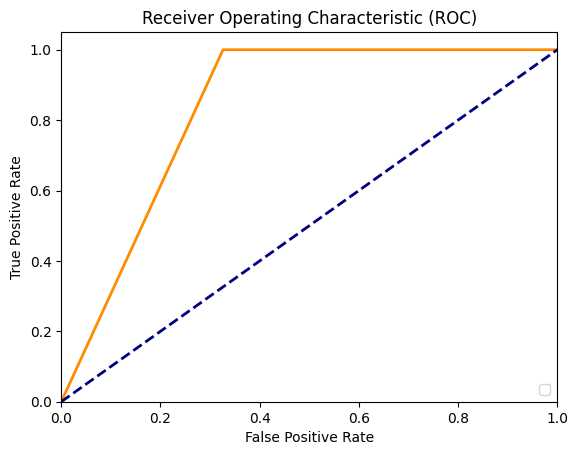

3/3 [==============================] - 1s 85ms/step
1
0.7940705128205128


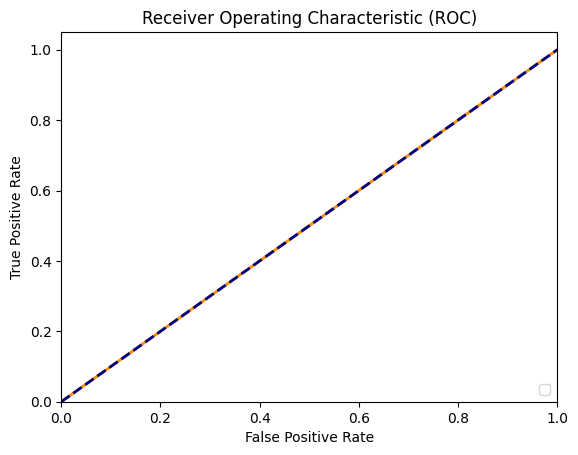

3/3 [==============================] - 1s 86ms/step
2
0.9128787878787878


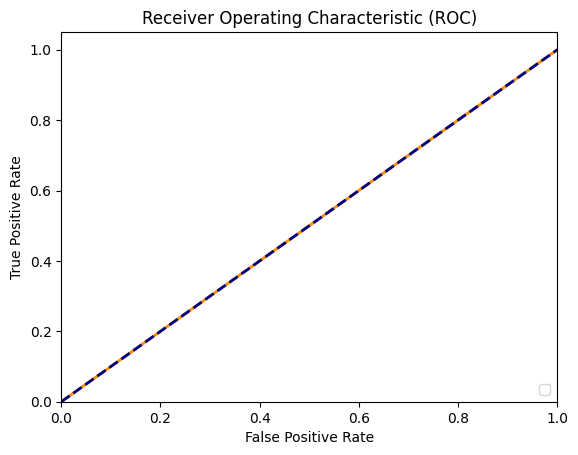

3/3 [==============================] - 1s 87ms/step


3
0.8827838827838828


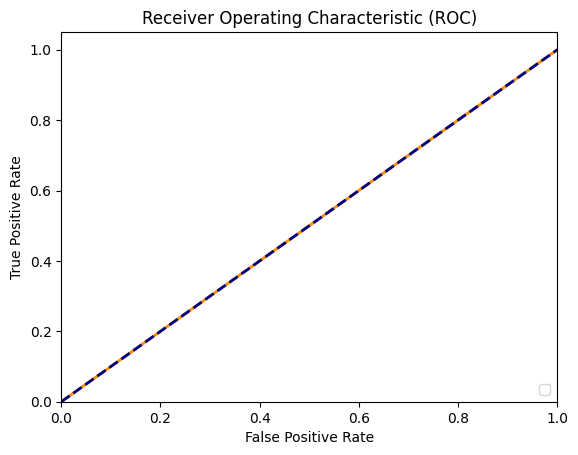

3/3 [==============================] - 1s 86ms/step


4
0.9040178571428571


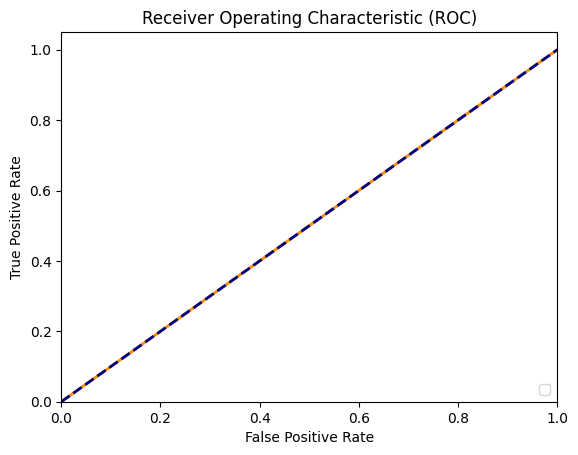

3/3 [==============================] - 1s 87ms/step


5
0.9226190476190477


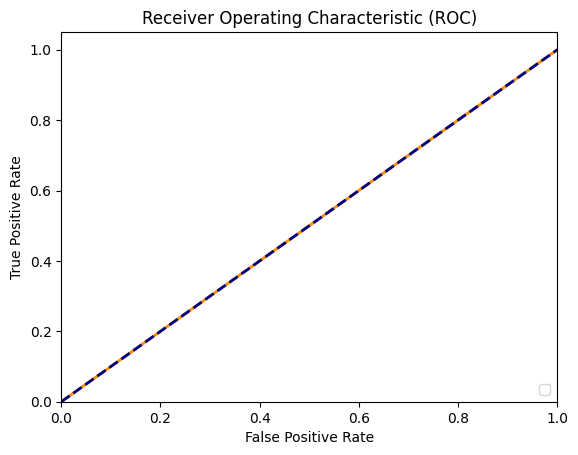

3/3 [==============================] - 1s 85ms/step
6
0.8985294117647059


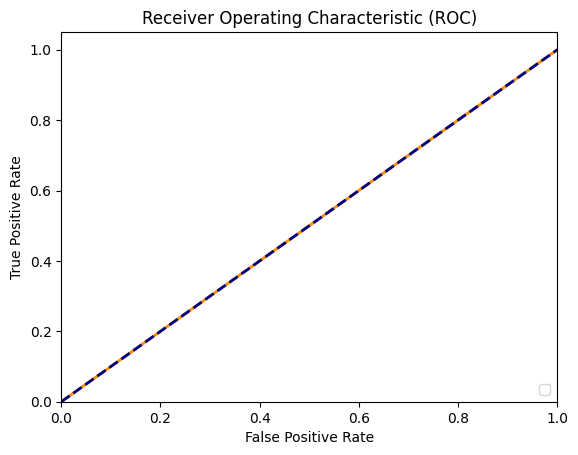

3/3 [==============================] - 2s 87ms/step
7
0.9759615384615384


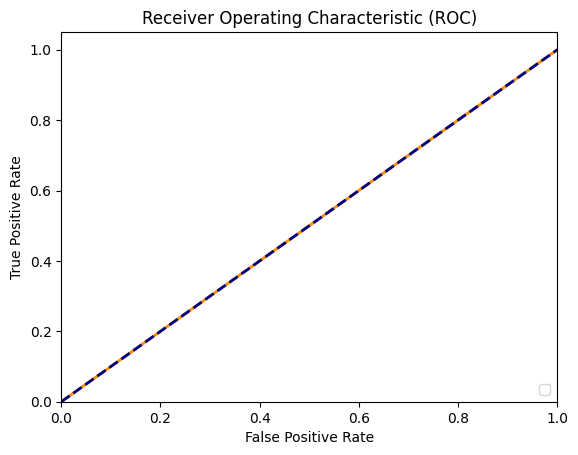

3/3 [==============================] - 2s 117ms/step


8
0.8923076923076922


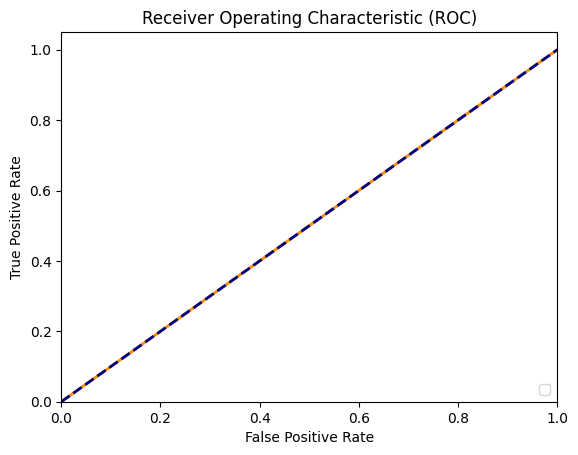

3/3 [==============================] - 2s 90ms/step


9
0.5


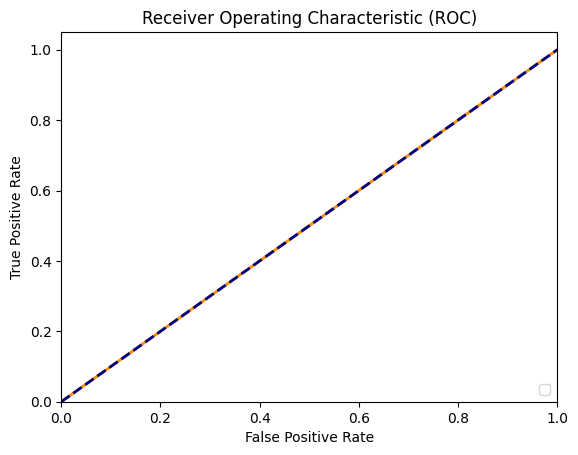

In [8]:
res_net_sns,res_net_spc,res_net_auc,res_net_val_loss,res_net_val_acc=sir_method(ResNet50,224,224)

In [11]:
print(f'Mean sensitivity of VGG16 after 10 epochs {np.mean(res_net_sns)}')
print(f'Mean specificity of VGG16 after 10 epochs {np.mean(res_net_spc)}')
print(f'Mean AUC of VGG16 after 10 epochs {np.mean(res_net_auc)}')

Mean sensitivity of VGG16 after 10 epochs 0.6671241748447632
Mean specificity of VGG16 after 10 epochs 0.758942710700399
Mean AUC of VGG16 after 10 epochs 0.9194962629658981


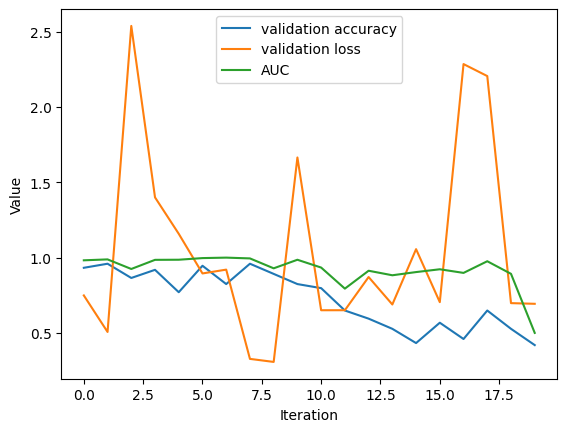

In [12]:
# Generate x-axis values (indices of the data list)
x = range(len(res_net_val_acc))

# Plot the data
plt.plot(x, res_net_val_acc,label='validation accuracy')
plt.plot(x, res_net_val_loss,label='validation loss')
plt.plot(x, res_net_auc,label='AUC')
# Add labels and title to the plot
plt.xlabel('Iteration')
plt.ylabel('Value')
# plt.title('Plot of List of Values')
# Adding legend
plt.legend()
# Display the plot
plt.show()

## For VGG 16 and 19 application

3/3 [==============================] - 0s 122ms/step


0
0.9256704980842911


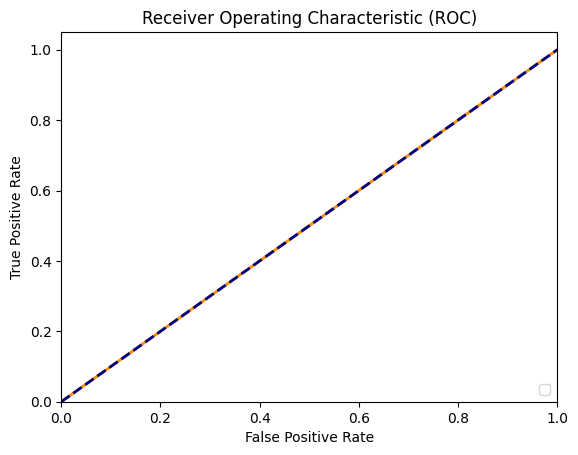

3/3 [==============================] - 0s 118ms/step


1
0.9126436781609195


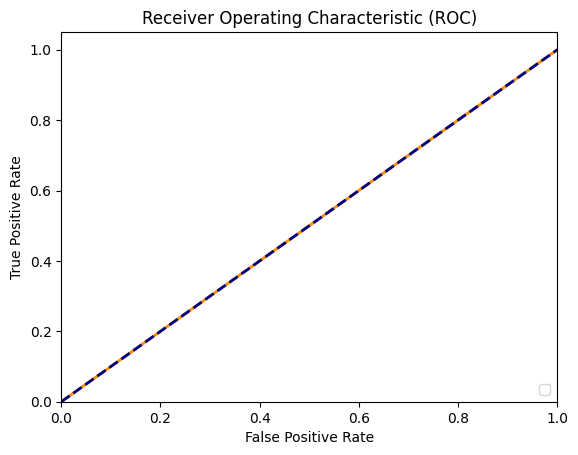

3/3 [==============================] - 0s 119ms/step


2
0.8934865900383142


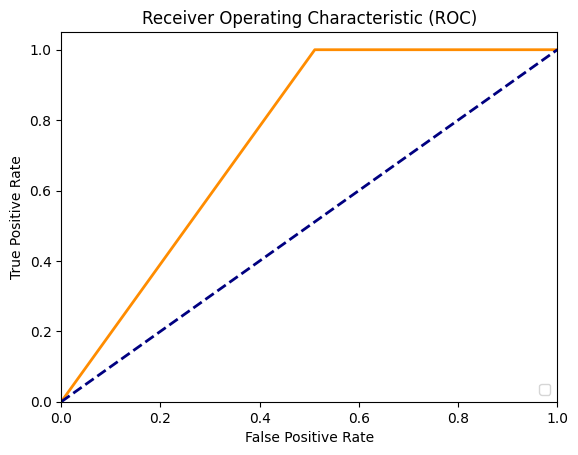

3/3 [==============================] - 0s 115ms/step


3
0.9011494252873563


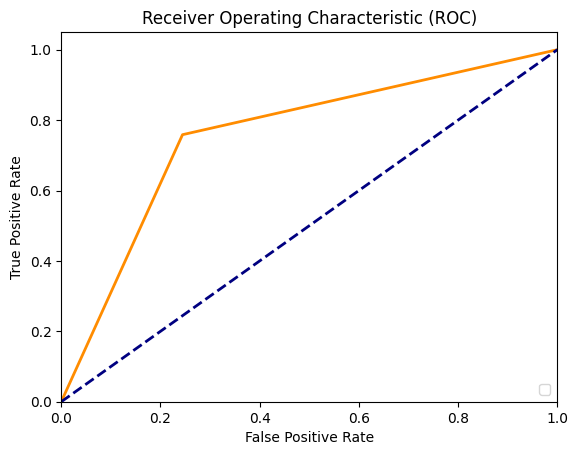

3/3 [==============================] - 0s 117ms/step


4
0.9083518107908353


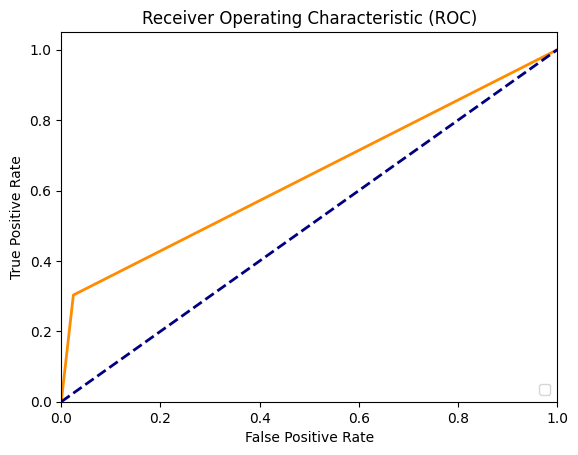

3/3 [==============================] - 0s 119ms/step


5
0.9136363636363638


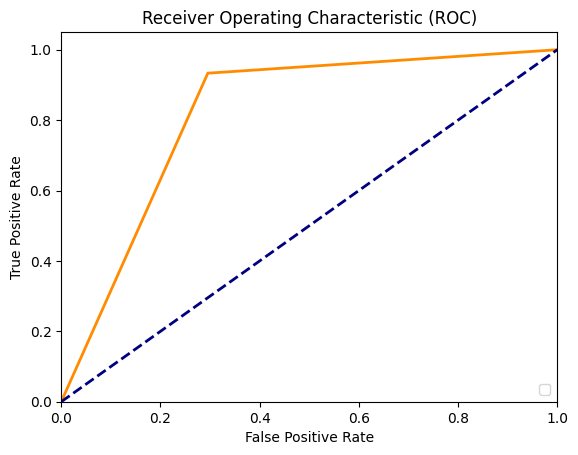

3/3 [==============================] - 0s 118ms/step


6
0.8823529411764706


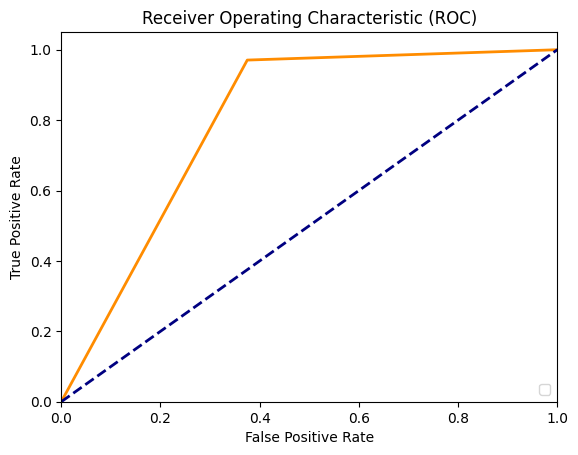

3/3 [==============================] - 0s 120ms/step
7
0.9609195402298851


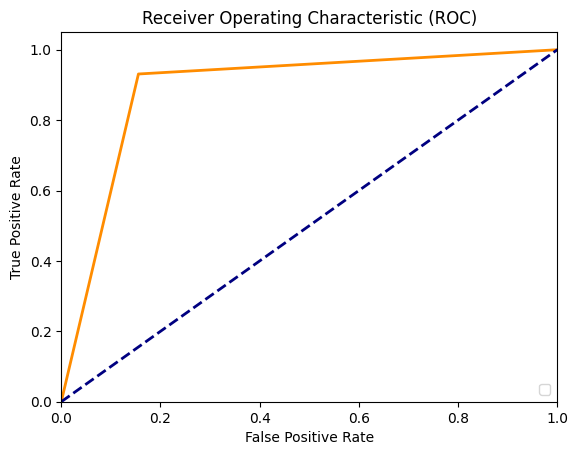

3/3 [==============================] - 0s 120ms/step


8
0.9416666666666667


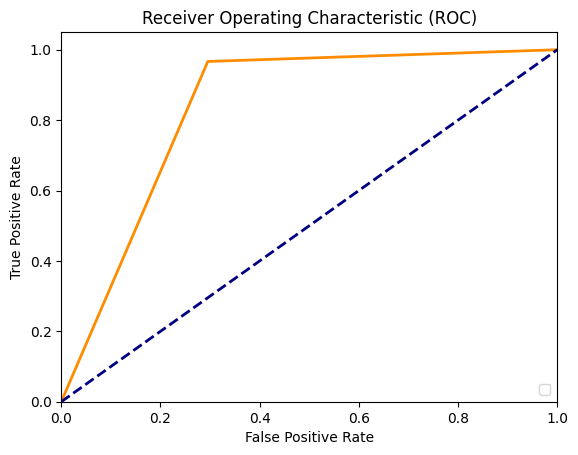

3/3 [==============================] - 0s 127ms/step


9
0.8970588235294118


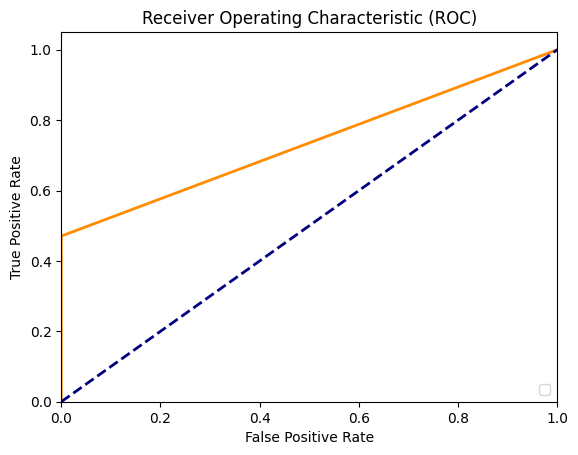

In [34]:
vgg16_sns,vgg16_spc,vgg16_auc,vgg16_val_loss,vgg16_val_acc=sir_method(VGG16,224,224)

In [35]:
print(f'Mean sensitivity of VGG16 after 10 epochs {np.mean(vgg16_sns)}')
print(f'Mean specificity of VGG16 after 10 epochs {np.mean(vgg16_spc)}')
print(f'Mean AUC of VGG16 after 10 epochs {np.mean(vgg16_auc)}')

Mean sensitivity of VGG16 after 10 epochs 0.5166930973016166
Mean specificity of VGG16 after 10 epochs 0.7214808611030775
Mean AUC of VGG16 after 10 epochs 0.8623494633882471


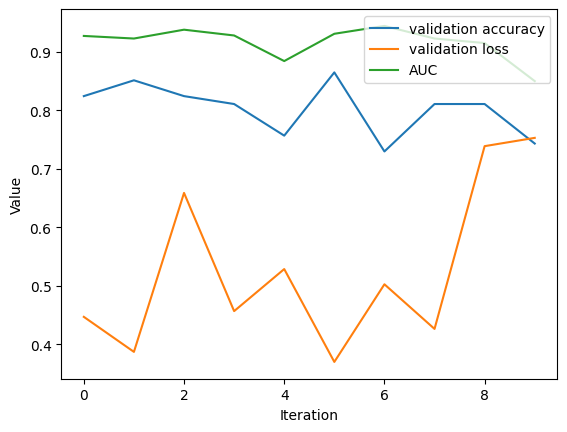

In [ ]:
# Generate x-axis values (indices of the data list)
x = range(len(vgg16_val_acc))

# Plot the data
plt.plot(x, vgg16_val_acc,label='validation accuracy')
plt.plot(x, vgg16_val_loss,label='validation loss')
plt.plot(x, vgg16_auc,label='AUC')
# Add labels and title to the plot
plt.xlabel('Iteration')
plt.ylabel('Value')
# plt.title('Plot of List of Values')
# Adding legend
plt.legend(loc='upper right')
# Display the plot
plt.show()

3/3 [==============================] - 0s 145ms/step


0
0.8735294117647057


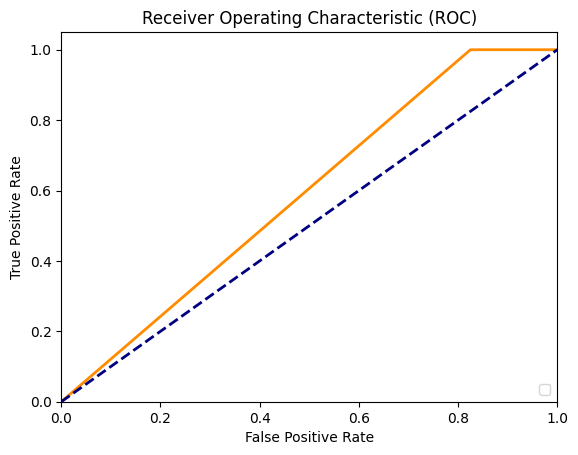

3/3 [==============================] - 1s 149ms/step


1
0.9113636363636364


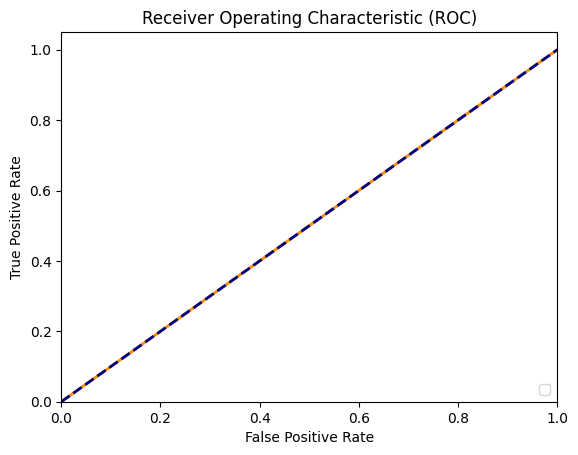

3/3 [==============================] - 0s 148ms/step


2
0.9077551020408163


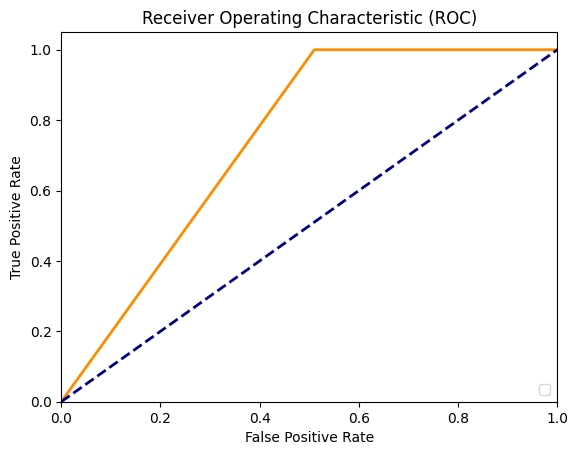

3/3 [==============================] - 1s 150ms/step


3
0.9446969696969698


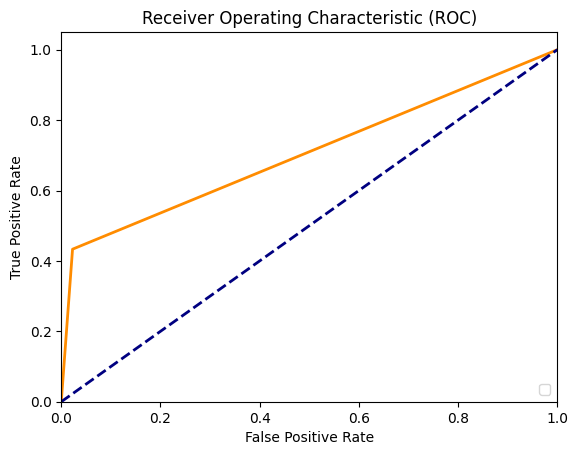

3/3 [==============================] - 0s 147ms/step


4
0.9632183908045977


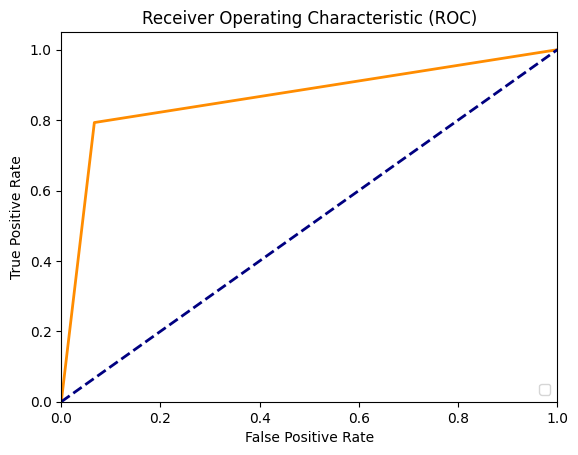

3/3 [==============================] - 1s 143ms/step


5
0.9838235294117647


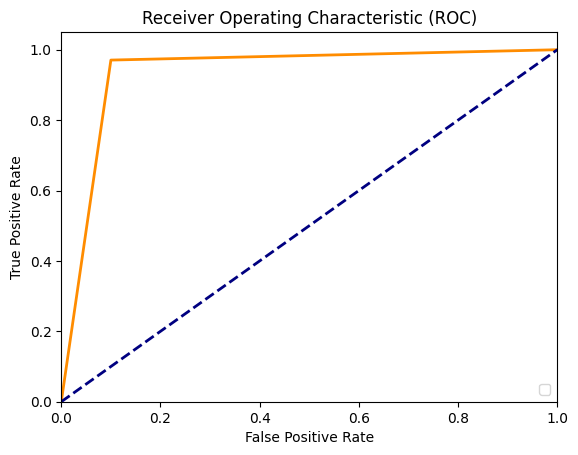

3/3 [==============================] - 0s 144ms/step


6
0.9684921230307577


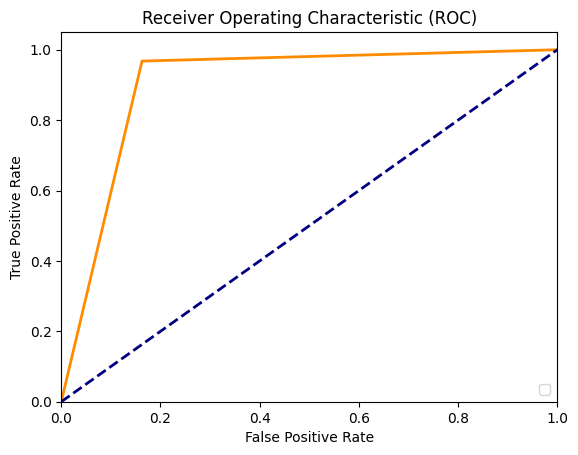

3/3 [==============================] - 1s 147ms/step


7
0.9477272727272728


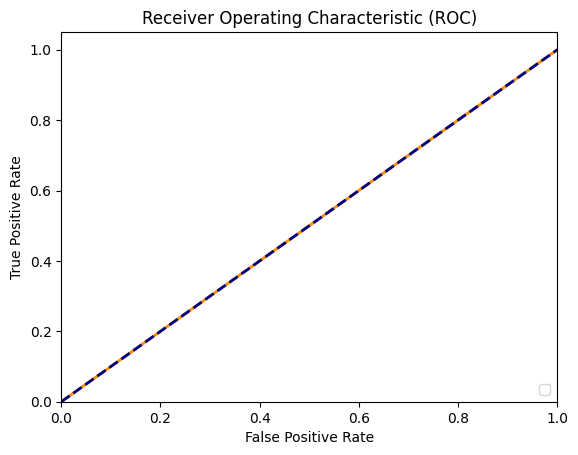

3/3 [==============================] - 0s 141ms/step


8
0.9322301024428685


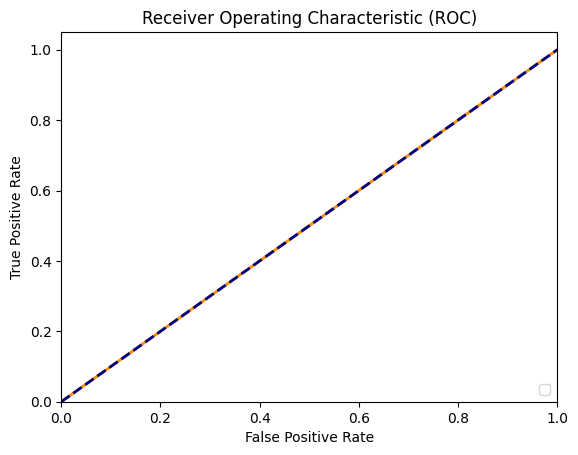

3/3 [==============================] - 1s 146ms/step


9
0.9615668883961567


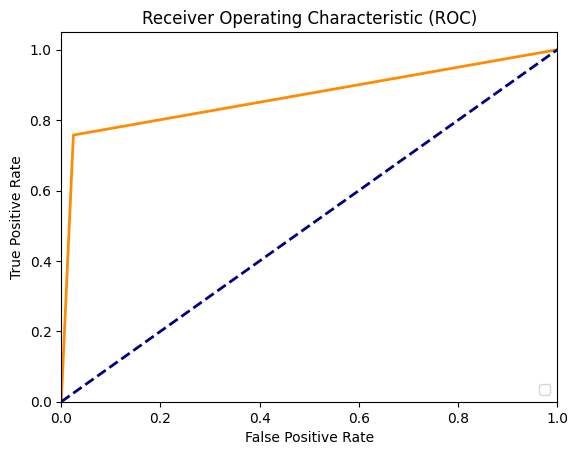

In [36]:
vgg19_sns,vgg19_spc,vgg19_auc,vgg19_val_loss,vgg19_val_acc=sir_method(VGG19,224,224)

In [ ]:
print(f'Mean sensitivity of VGG19 after 10 epochs {np.mean(vgg19_sns)}')
print(f'Mean specificity of VGG19 after 10 epochs {np.mean(vgg19_spc)}')
print(f'Mean AUC of VGG19 after 10 epochs {np.mean(vgg19_auc)}')

Mean sensitivity of VGG19 after 10 epochs 0.7601875781467813
Mean specificity of VGG19 after 10 epochs 0.74491001241212
Mean AUC of VGG19 after 10 epochs 0.9277679202159798


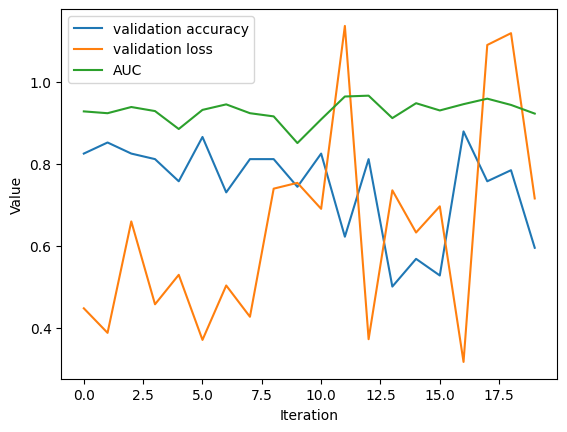

In [ ]:
# Generate x-axis values (indices of the data list)
x = range(len(vgg19_val_acc))

# Plot the data
plt.plot(x, vgg19_val_acc,label='validation accuracy')
plt.plot(x, vgg19_val_loss,label='validation loss')
plt.plot(x, vgg19_auc,label='AUC')
# Add labels and title to the plot
plt.xlabel('Iteration')
plt.ylabel('Value')
# plt.title('Plot of List of Values')
# Adding legend
plt.legend()
# Display the plot
plt.show()

## Fine Tuning of Mobile Net

In [25]:
#### SIR Newly Mentioned Logic of sampling
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
sns=[]
spc=[]
AUC=[]
validation_loss=[]
validation_accuracy=[]
# Assuming you have your feature data in 'X' and labels in 'y'
# Define your model as 'model'
# Define the number of epochs as 'num_epochs'
def sir_method_fine_tuned_model(base,height,width):
# Get the total number of samples
  num_samples = len(labels)
  num_epochs=10
  for epoch in range(num_epochs):
      # Shuffle the data and labels
      shuffled_indices = np.random.permutation(num_samples)
      X_shuffled = data[shuffled_indices]
      y_shuffled =labels[shuffled_indices]

      # Split the data into training and validation sets
      train_size = int(0.8 * num_samples)
      X_train, X_val = X_shuffled[:train_size], X_shuffled[train_size:]
      y_train, y_val = y_shuffled[:train_size], y_shuffled[train_size:]
      base_model = base(weights='imagenet', include_top=False, input_shape=(height, width, 3))

        # Set up the model architecture
      model = Sequential()
      model.add(base_model)
      model.add(Flatten())
      model.add(Dense(height, activation='relu'))
      model.add(Dropout(0.5))
      model.add(Dense(1, activation='sigmoid'))
      base_model.trainable = False

      # Compile the model
      model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
      # Train the model on the training set
      model.fit(X_train, y_train, epochs=1, batch_size=50, verbose=0)
      # Evaluate the model on the validation set
      val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
      validation_loss.append(val_loss)
      validation_accuracy.append(val_acc)
      # Make predictions on the validation set
      y_pred = model.predict(X_val)
      y_pred_binary = (y_pred >= 0.5).astype(int)
      # Calculate the ROC curve
      fpr1, tpr1, thresholds = roc_curve(y_val, y_pred_binary)
      # Calculate sensitivity, specificity, and AUC
      cm = confusion_matrix(y_val, np.round(y_pred))
      tn, fp, fn, tp = cm.ravel()
      sensitivity = tp / (tp + fn)
      specificity = tn / (tn + fp)
      auc1 = roc_auc_score(y_val, y_pred)
      sns.append(sensitivity)
      spc.append(specificity)
      AUC.append(auc1)
      print(epoch)
      print(auc1)
      # print(roc_auc)
      plt.plot(fpr1, tpr1, color='darkorange', lw=2, )
      plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver Operating Characteristic (ROC)')
      plt.legend(loc="lower right")
      plt.show()
      # Print the evaluation metrics
      # print(f"Epoch {epoch+1} - Sensitivity: {sensitivity:.4f} - Specificity: {specificity:.4f} - AUC: {auc:.4f}")
  return sns,spc,AUC,validation_loss,validation_accuracy


3/3 [==============================] - 0s 31ms/step


0
0.991941391941392


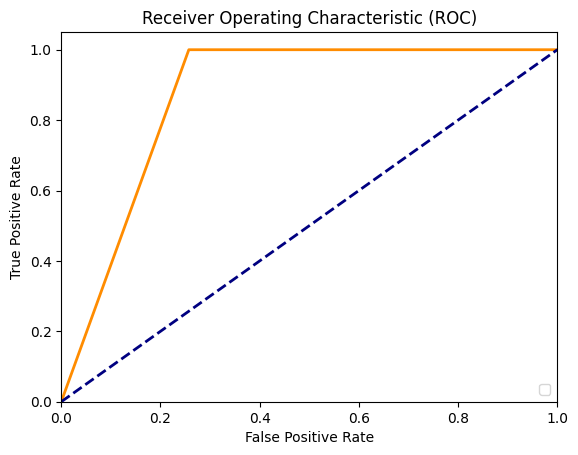

3/3 [==============================] - 1s 30ms/step


1
0.9923371647509578


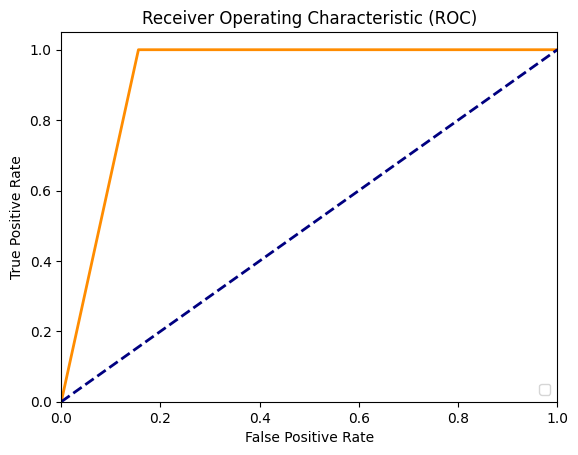

3/3 [==============================] - 0s 30ms/step


2
1.0


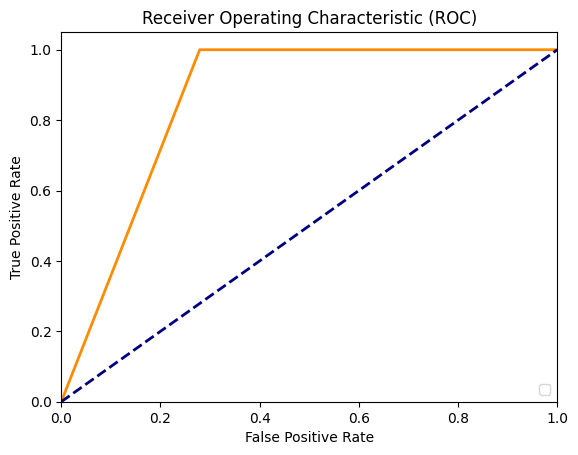

3/3 [==============================] - 1s 29ms/step


3
0.9925595238095238


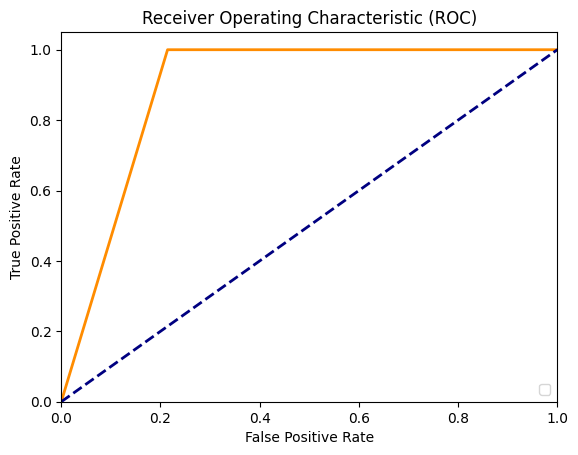

3/3 [==============================] - 1s 30ms/step


4
0.9954988747186797


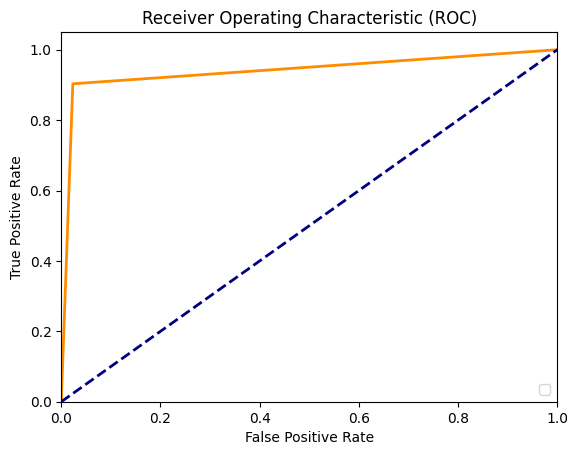

3/3 [==============================] - 0s 30ms/step


5
0.9938697318007663


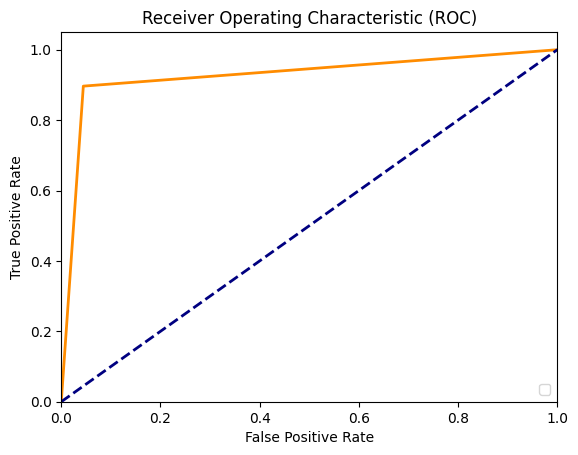

3/3 [==============================] - 0s 30ms/step


6
0.9701149425287356


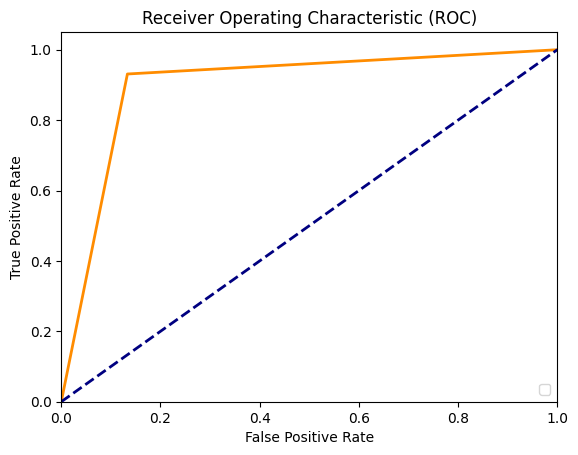

3/3 [==============================] - 1s 37ms/step


7
0.9976359338061466


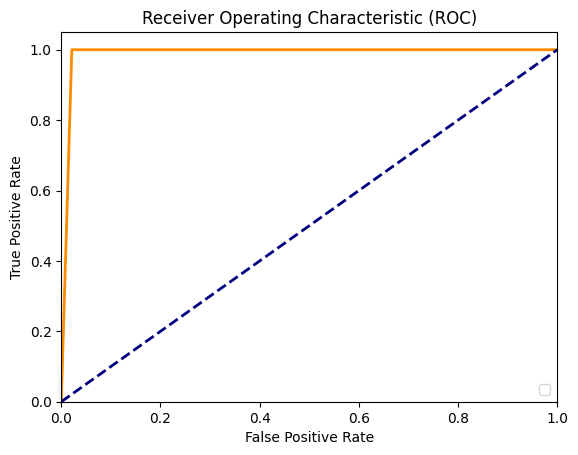

3/3 [==============================] - 1s 35ms/step


8
0.9860294117647058


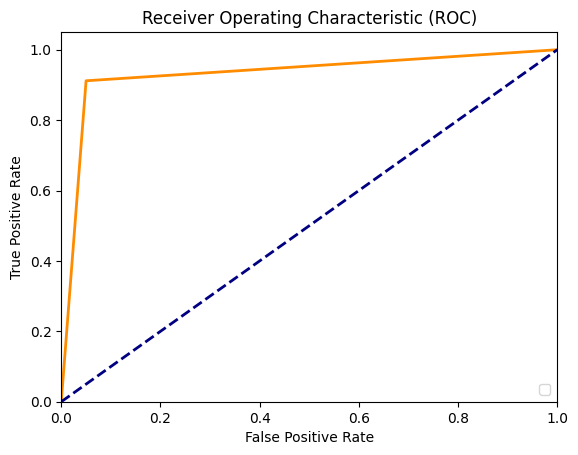

3/3 [==============================] - 1s 31ms/step


9
0.9985390796201608


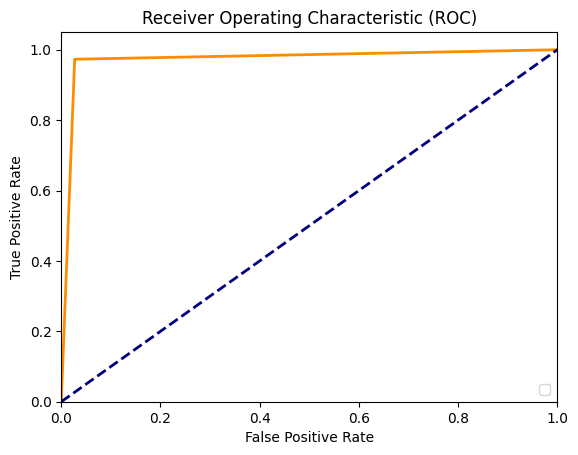

In [26]:
fine_tuned_sns,fine_tuned_spc,fine_tuned_auc,fine_tuned_val_loss,fine_tuned_val_acc=sir_method_fine_tuned_model(MobileNet,224,224)

In [27]:
print(f'Mean sensitivity of fine tuned MobileNet after 10 epochs {np.mean(fine_tuned_sns)}')
print(f'Standard deviation sensitivity of fine tuned MobileNet after 10 epochs {np.var(fine_tuned_sns)}')
print(f'Mean specificity of fine tuned MobileNet after 10 epochs {np.mean(fine_tuned_spc)}')
print(f'Standard deviation specificity of fine tuned MobileNet after 10 epochs {np.var(fine_tuned_spc)}')
print(f'Mean AUC of fine tuned MobileNet after 10 epochs {np.mean(fine_tuned_auc)}')
print(f'Standard deviation AUC of fine tuned MobileNet after 10 epochs {np.var(fine_tuned_auc)}')

Mean sensitivity of fine tuned MobileNet after 10 epochs 0.9615549692203491
Standard deviation sensitivity of fine tuned MobileNet after 10 epochs 0.0018558756285610646
Mean specificity of fine tuned MobileNet after 10 epochs 0.879460889107104
Standard deviation specificity of fine tuned MobileNet after 10 epochs 0.009279858276107767
Mean AUC of fine tuned MobileNet after 10 epochs 0.9918526054741068
Standard deviation AUC of fine tuned MobileNet after 10 epochs 6.690779282504707e-05


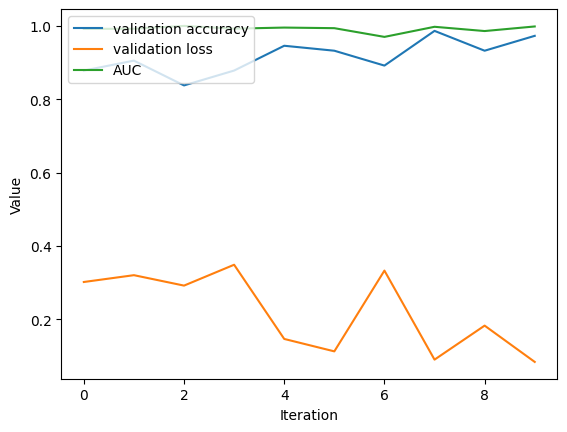

In [28]:
# Generate x-axis values (indices of the data list)
x = range(len(fine_tuned_val_acc))

# Plot the data
plt.plot(x, fine_tuned_val_acc,label='validation accuracy')
plt.plot(x, fine_tuned_val_loss,label='validation loss')
plt.plot(x, fine_tuned_auc,label='AUC')
# Add labels and title to the plot
plt.xlabel('Iteration')
plt.ylabel('Value')
# plt.title('Plot of List of Values')
# Adding legend
plt.legend(loc='upper left')
# Display the plot
plt.show()

In [ ]:
#### Exprimenting with the epoch number 20
#### SIR Newly Mentioned Logic of sampling
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
sns=[]
spc=[]
AUC=[]
validation_loss=[]
validation_accuracy=[]

# Assuming you have your feature data in 'X' and labels in 'y'
# Define your model as 'model'
# Define the number of epochs as 'num_epochs'
def sir_method(base,height,width):
# Get the total number of samples
  num_samples = len(labels)
  num_epochs=20
  for epoch in range(num_epochs):
      # Shuffle the data and labels
      shuffled_indices = np.random.permutation(num_samples)
      X_shuffled = data[shuffled_indices]
      y_shuffled =labels[shuffled_indices]

      # Split the data into training and validation sets
      train_size = int(0.8 * num_samples)
      X_train, X_val = X_shuffled[:train_size], X_shuffled[train_size:]
      y_train, y_val = y_shuffled[:train_size], y_shuffled[train_size:]
      base_model = base(weights='imagenet', include_top=False, input_shape=(height, width, 3))

        # Set up the model architecture
      model = Sequential()
      model.add(base_model)
      model.add(Flatten())
      model.add(Dense(height, activation='relu'))
      model.add(Dropout(0.5))
      model.add(Dense(1, activation='sigmoid'))
      base_model.trainable = False

      # Compile the model
      model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
      # Train the model on the training set
      model.fit(X_train, y_train, epochs=1, batch_size=50, verbose=0)
      # Evaluate the model on the validation set
      val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
      validation_loss.append(val_loss)
      validation_accuracy.append(val_acc)
      # Make predictions on the validation set
      y_pred = model.predict(X_val)
      # y_pred_prob = model.predict_proba(X_val)[:, 1]

      # Calculate sensitivity, specificity, and AUC
      cm = confusion_matrix(y_val, np.round(y_pred))
      tn, fp, fn, tp = cm.ravel()
      sensitivity = tp / (tp + fn)
      specificity = tn / (tn + fp)
      auc = roc_auc_score(y_val, y_pred)
      # roc_auc = roc_auc_score(y_val, y_pred_prob)
            # Calculate the ROC curve
      fpr1, tpr1, thresholds = roc_curve(y_val, y_pred_binary)
      sns.append(sensitivity)
      spc.append(specificity)
      AUC.append(auc)

      # ROC_AUC.append(roc_auc)
      # Print the evaluation metrics
      # print(f"Epoch {epoch+1} - Sensitivity: {sensitivity:.4f} - Specificity: {specificity:.4f} - AUC: {auc:.4f}")
  return sns,spc,AUC,validation_loss,validation_accuracy


3/3 [==============================] - 0s 31ms/step
Mean sensitivity of MobileNet after 20 epochs 0.9563949192993876
Mean specificity after 20 epochs 0.9010787336859432
Mean AUC after 20 epochs 0.9863245715724244


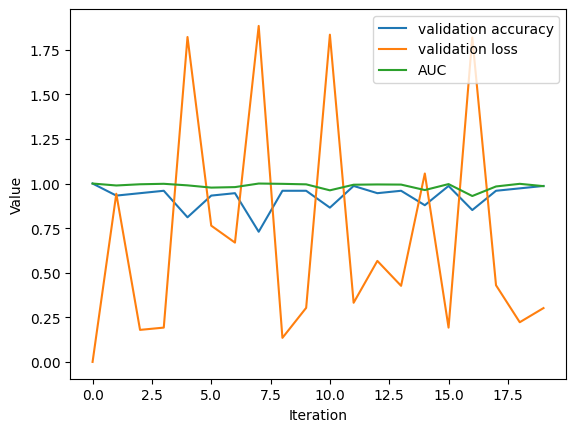

In [ ]:
mobile_net_sns,mobile_net_spc,mobile_net_auc,mobile_net_val_loss,mobile_net_val_acc=sir_method(MobileNet,224,224)
print(f'Mean sensitivity of MobileNet after 20 epochs {np.mean(mobile_net_sns)}')
print(f'Mean specificity after 20 epochs {np.mean(mobile_net_spc)}')
print(f'Mean AUC after 20 epochs {np.mean(mobile_net_auc)}')
# Generate x-axis values (indices of the data list)
x = range(len(mobile_net_val_acc))

# Plot the data
plt.plot(x, mobile_net_val_acc,label='validation accuracy')
plt.plot(x, mobile_net_val_loss,label='validation loss')
plt.plot(x, mobile_net_auc,label='AUC')
# Add labels and title to the plot
plt.xlabel('Iteration')
plt.ylabel('Value')
# plt.title('Plot of List of Values')
# Adding legend
plt.legend()
# Display the plot
plt.show()